# see what angles get reconstructed well

In [19]:
import jkutils
import os, sys
import numpy as np
import scipy.stats as stats
from keras.models import load_model
import math
import shelve
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

energy, azmiuth, zenith, muex = 0, 1, 2, 3

following code loads the saved model from final_network.h5 and tests the testdatasets on it (saves to res and train_out)

In [22]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_2/'
data_location = '/data/user/jkager/NN_Reco/'

today = '2017-07-31'
project_name = 'charge_highE_v1'

project_folder = 'train_hist/{}/{}'.format(today, project_name)
print "looking for", project_folder
if not os.path.exists('{}'.format(os.path.join(file_location,project_folder))):
    print "project not found. exiting..."
    sys.exit(-1)
shelf = shelve.open(os.path.join(file_location, project_folder, 'run_info.shlf'))
input_files = shelf['Files']
train_inds = shelf['Train_Inds'] 
valid_inds = shelf['Valid_Inds']
test_inds = shelf['Test_Inds']
inf_times_as = shelf['inf_times_as']
try:
    using = shelf['using']
except KeyError:
    using = 'time'
shelf.close()

input_data, out_data, file_len = jkutils.read_files(input_files.split(':'), data_location)
print('\n Load the Model (final_network.h5) \n')
model = load_model(os.path.join(\
file_location,'train_hist/{}/{}/final_network.h5'.format(today, project_name)))

print('\n Calculate Results... \n')
res = []
test_out = []

if using == 'charge':
    preprocess = jkutils.fake_preprocess
else:
    preprocess = jkutils.preprocess
for i in range(len(input_data)):
    print('Predict Values for {}'.format(input_files.split(':')[i]))
    test_in_chunk  = np.array(map(np.ndarray.flatten, jkutils.preprocess(input_data[i][test_inds[i][0]:test_inds[i][1]],
                                                                        inf_times_as)))
    test_out_chunk = out_data[i][test_inds[i][0]:test_inds[i][1],zenith:zenith+1]
    res_chunk = model.predict(test_in_chunk, verbose=3)
    res.extend(list(res_chunk))
    test_out.extend(list(test_out_chunk))

res = np.squeeze(res)
test_out = np.squeeze(test_out)
p = test_out.argsort() # sort zeniths
res = res[p]
test_out = test_out[p]
correct = np.sum(res == jkutils.zenith_to_binary(test_out))
total = len(res)
print "{} / {} = {:6.2f}%".format(correct, total, float(correct)/total*100)

looking for train_hist/2017-07-31/charge_highE_v1

 Load the Model (final_network.h5) 


 Calculate Results... 

Predict Values for 11069_00000-00999.h5
Predict Values for 11069_01000-01999.h5
Predict Values for 11069_02000-02999.h5
Predict Values for 11069_03000-03999.h5
Predict Values for 11069_04000-04999.h5
Predict Values for 11069_05000-05999.h5
0 / 112561 =   0.00%


In [105]:
test_out[0]

0.015984673119440629

In [21]:
dir(model.layers[-1])

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_built',
 '_constraints',
 '_get_node_attribute_at_index',
 '_initial_weights',
 '_losses',
 '_non_trainable_weights',
 '_per_input_losses',
 '_per_input_updates',
 '_trainable_weights',
 '_updates',
 'activation',
 'activity_regularizer',
 'add_loss',
 'add_update',
 'add_weight',
 'assert_input_compatibility',
 'bias',
 'bias_constraint',
 'bias_initializer',
 'bias_regularizer',
 'build',
 'built',
 'call',
 'compute_mask',
 'compute_output_shape',
 'constraints',
 'count_params',
 'from_config',
 'get_config',
 'get_input_at',
 'get_input_mask_at',
 'get_input_shape_at',
 'get_losses_for',
 'get_output_at',
 'get_output_mask_at',
 'get_output_shape_at',
 'get_updates_for',
 'get_w

In [115]:
map(lambda x: x.name, model.layers)

[u'dense_1', u'dropout_1', u'dense_2', u'dropout_2', u'dense_3']

In [66]:
model.input

/dense_1_input

In [92]:
# from: https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp]+ [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

# Testing
test = np.array(map(np.ndarray.flatten, jkutils.preprocess(input_data[0][test_inds[0][0]:test_inds[0][0]+1],
                                                                        inf_times_as)))
layer_outs = [func([test, 1.]) for func in functors]
print layer_outs

[[array([[ 0.        ,  1.55244601,  4.94290733, ...,  0.        ,
         2.7838273 ,  0.        ]], dtype=float32)], [array([[ 0.        ,  2.58740997,  0.        , ...,  0.        ,
         4.63971186,  0.        ]], dtype=float32)], [array([[  8.79131854e-02,   5.82144928e+00,   8.55511487e-01,
          4.76950109e-02,   2.46944571e+00,   2.21882742e-02,
          3.08569179e-05,   3.82602885e-02,   7.82321739e+00,
          3.56992984e+00,   5.87899923e+00,   5.30530870e-01,
          1.76043049e-01,   3.47054148e+00,   4.87033278e-02,
          1.30814269e-01,   4.03670120e+00,   4.82372856e+00,
          1.70013607e+00,   2.50053080e-03,   1.08644376e-02,
          4.94818985e-02,   8.51276815e-01,   7.94775877e-03,
          9.94884729e-01,   2.40129519e+00,   7.51055777e-02,
          2.68828225e+00,   3.11024427e+00,   1.59126890e+00,
          2.72175956e+00,   6.38800323e-01,   6.50530577e-01,
          5.43016577e+00,   1.24264712e-04,   3.09476638e+00,
          5.5775

In [93]:
layer_outs[-1][0][0]

array([ 1.], dtype=float32)

In [116]:
dense_2_out = layer_outs[3][0][0]
dropout_2_out = layer_outs[4][0][0]

In [117]:
print dropout_2_out

[ 1.]


In [96]:
dense_3_weights = model.layers[-1].get_weights()

In [102]:
dense_3_weights = dense_3_weights[0].squeeze()

In [107]:
map(np.shape,[dense_2_out,dense_3_weights])

[(612,), (612,)]

In [104]:
result = np.sum(dense_2_out * dense_3_weights)
print result

-10.563


In [14]:
# sns.distplot(res) -> does not work because input is just ones (res = [1,1,1,1,...])

In [12]:
splits = 19
x_hist = np.linspace(0,math.pi,splits)
y_hist = np.zeros((splits-1))
cor, summe = 0, 0
for i in range(len(x_hist)-1):
    indizes = np.bitwise_and(test_out >= x_hist[i], test_out < x_hist[i+1])
    correct = np.sum(res[indizes] == jkutils.zenith_to_binary(test_out[indizes]))
    print correct, np.sum(indizes), x_hist[i] * 180/math.pi
    cor += correct
    summe += np.sum(indizes)
    y_hist[i] = float(correct)/np.sum(indizes)
print cor / float(summe)

0 197 0.0
0 467 10.0
0 661 20.0
0 752 30.0
0 838 40.0
0 1028 50.0
0 1278 60.0
0 1499 70.0
0 1782 80.0
1868 1868 90.0
1680 1680 100.0
1633 1633 110.0
1487 1487 120.0
1233 1233 130.0
1008 1008 140.0
763 763 150.0
496 496 160.0
171 171 170.0
0.548750066345


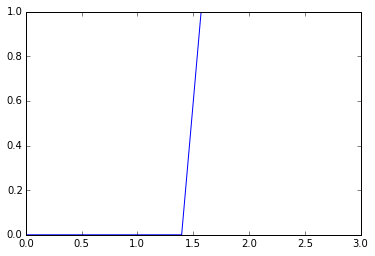

In [6]:
plt.plot(x_hist[:-1],y_hist)

In [ ]:
y_hist_items=[]
for x, y in zip(x_hist[:-1],y_hist):
    x = x * 180 / math.pi
    y_hist_items.extend([x+5] * int(y * 100))

In [14]:
np.linspace(0,180,19)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.])

In [18]:
a=np.arange(9)
ind=a>4

In [19]:
np.sum(ind)

4

In [3]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_2/'
data_location = '/data/user/jkager/NN_Reco/'

today = '2017-07-31'
project_name = 'time1_h012_v1_w2do'

project_folder = 'train_hist/{}/{}'.format(today, project_name)
print "looking for", project_folder
if not os.path.exists('{}'.format(os.path.join(file_location,project_folder))):
    print "project not found. exiting..."
    sys.exit(-1)
shelf = shelve.open(os.path.join(file_location, project_folder, 'run_info.shlf'))
input_files = shelf['Files']
train_inds = shelf['Train_Inds'] 
valid_inds = shelf['Valid_Inds']
test_inds = shelf['Test_Inds']
inf_times_as = shelf['inf_times_as']
shelf.close()

input_data, out_data, file_len = jkutils.read_files(input_files.split(':'), data_location)
print('\n Load the Model (final_network.h5) \n')
model = load_model(os.path.join(\
file_location,'train_hist/{}/{}/final_network.h5'.format(today, project_name)))

print('\n Calculate Results... \n')
res = []
test_out = []

for i in range(len(input_data)):
    print('Predict Values for {}'.format(input_files.split(':')[i]))
    test_in_chunk  = np.array(map(np.ndarray.flatten, jkutils.preprocess(input_data[i][test_inds[i][0]:test_inds[i][1]],
                                                                        inf_times_as)))
    test_out_chunk = out_data[i][test_inds[i][0]:test_inds[i][1],zenith:zenith+1]
    res_chunk = model.predict(test_in_chunk, verbose=3)
    res.extend(list(res_chunk))
    test_out.extend(list(test_out_chunk))

res = np.squeeze(res)
test_out = np.squeeze(test_out)
p = test_out.argsort() # sort zeniths
res = res[p]
test_out = test_out[p]
correct = np.sum(res == jkutils.zenith_to_binary(test_out))
total = len(res)
print "{} / {} = {:6.2f}%".format(correct, total, float(correct)/total*100)

looking for train_hist/2017-07-31/time1_h012_v1_w2do

 Load the Model (final_network.h5) 


 Calculate Results... 

Predict Values for 11069_00000-00999.h5
Predict Values for 11069_01000-01999.h5
Predict Values for 11069_02000-02999.h5
30797 / 56971 =  54.06%


In [ ]:
test_out

# analyze test_results

In [6]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_2/'
data_location = '/data/user/jkager/NN_Reco/'

today = '2017-07-31'
project_name = 'charge_highE_v1'

project_folder = 'train_hist/{}/{}'.format(today, project_name)
print "looking for", project_folder
if not os.path.exists('{}'.format(os.path.join(file_location,project_folder))):
    print "project not found. exiting..."
    sys.exit(-1)
print "found"

looking for train_hist/2017-07-31/charge_highE_v1
found


In [7]:
test_results = np.load(os.path.join(project_folder, 'test_results.npy'))

In [14]:
counter = 0
for pred, real in zip(test_results[0], test_results[1]):
    if real == 1 and pred < 0.5:
        counter += 1
    if real == 0 and pred > 0.5:
        counter -= 1
    #print real, np.round(pred)

In [15]:
counter, len(test_results[0])

(-15480, 112561)

# accuracy per angle #

## last activation function as linout to see what the outputs are

In [15]:
file_location = '/data/user/jkager/NN_Reco/johannes/updownclassification_2/'
data_location = '/data/user/jkager/NN_Reco/'

today = '2017-07-30'
project_name = 'time10_h0_v1_linout'

project_folder = 'train_hist/{}/{}'.format(today, project_name)
print "looking for", project_folder
if not os.path.exists('{}'.format(os.path.join(file_location,project_folder))):
    print "project not found. exiting..."
    sys.exit(-1)

looking for train_hist/2017-07-30/time10_h0_v1_linout


In [16]:
test_results = np.load(os.path.join(project_folder, 'test_results.npy'))

In [17]:
for pred, real in zip(test_results[0], test_results[1]):
    print real, pred

1.0 65543.0546875
1.0 64762.3398438
1.0 65106.0507812
1.0 65384.328125
0.0 64725.1835938
1.0 65454.0351562
0.0 65085.5273438
1.0 65336.6484375
0.0 65218.7851562
0.0 64109.1054688
0.0 64980.9101562
1.0 64911.8242188
1.0 65517.2382812
1.0 65255.9023438
1.0 65441.6445312
1.0 64516.2109375
0.0 63926.1640625
1.0 64926.2929688
1.0 65500.390625
0.0 64425.2460938
0.0 65362.3242188
1.0 65313.4101562
1.0 65203.2539062
1.0 65492.7851562
1.0 65361.5351562
1.0 65497.6367188
1.0 65392.8476562
1.0 65255.6445312
0.0 64625.703125
1.0 65258.4882812
1.0 65023.2421875
1.0 65478.3007812
0.0 64074.6640625
0.0 64670.8671875
1.0 64478.7773438
0.0 65449.6132812
1.0 65536.859375
0.0 64226.0117188
1.0 64739.5429688
0.0 65335.7109375
1.0 65542.1328125
1.0 64529.84375
0.0 64474.7734375
1.0 65555.4375
0.0 65109.4257812
1.0 65504.7070312
1.0 65115.2460938
1.0 65435.4765625
1.0 65072.0625
1.0 65504.2578125
1.0 65260.0976562
1.0 65447.2226562
1.0 65398.671875
1.0 65454.7851562
0.0 65019.9453125
1.0 65527.390625
0.0 64